# Basic Image Manipulation

Linear algebra, with its operations on vectors and matrices, is fundamental to image processing and computer vision. An image can be understood as a matrix (or matrices) of pixel values, and linear algebra provides the tools to manipulate these matrices for various applications. 

The following is a basic introduction to how linear algebra is applied to images.

## Representation of Images

- **Grayscale Images** : A grayscale image can be represented as a 2D matrix, where each element of the matrix corresponds to a pixel value in the image. The values typically range from 0 to 255, where 0 represents black, 255 represents white, and the values in between represent shades of gray.

- **Color Images**: Color images are usually represented in the RGB color space, where an image consists of three matrices (or a 3D array), each corresponding to the Red, Green, and Blue channels. Thus, each pixel is represented by a triplet of values, each indicating the intensity of red, green, and blue components.

## Basic Operations

- **Scaling**: Scaling an image involves multiplying the pixel values by a scalar to adjust the brightness. Increasing pixel values (up to a limit) makes the image brighter, while decreasing them makes the image darker.

- **Rotation** : Rotating an image by a certain angle involves applying a rotation matrix to the coordinates of each pixel. This is a classic example of using linear transformation in image processing.

- **Translation**: Moving an image in space requires adding a constant vector to the coordinates of each pixel, another operation that is directly derived from linear algebra.

## Advanced Operations

- **Image Filtering**: Filters, such as blurring, sharpening, or edge detection, are applied to images using convolution operations. A filter (or kernel) is a small matrix that is applied to each pixel and its neighbors in the image, combining them into a single value through a dot product operation.

- **Dimensionality Reduction**: Techniques like Principal Component Analysis (PCA) can be used for image compression or noise reduction. PCA involves calculating the eigenvectors and eigenvalues of the covariance matrix of the dataset, identifying the principal components that capture the most variance in the data.

- **Image Reconstruction**: In tasks like image compression or recovery, linear algebra can be used to reconstruct images from a set of basis images. Techniques such as Singular Value Decomposition (SVD) can decompose an image into a series of orthogonal components, which can then be used to approximate the original image by keeping only the most significant components.

The following are some examples related mostly to Representation of Images, and Basic Operations.

## Representation of Images

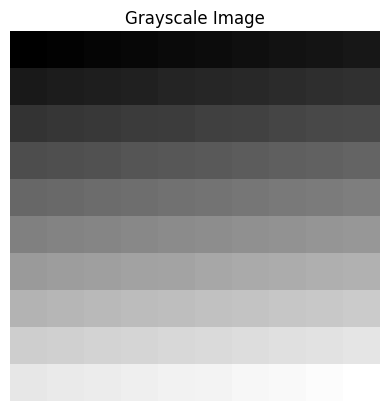

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# creata 100 equally spaced values ranging from 0 to 255 
values = np.linspace(0, 255, 10*10)

# change the orientation of the values to be a 10x10 square
values = values.reshape(10,10)

# convert the values to integer
grayscale_image = values.astype(np.uint8)

plt.imshow(grayscale_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis('off')  # Hide the axes
plt.show()

Now, let's do the same but use 3 channels (R,G,B).

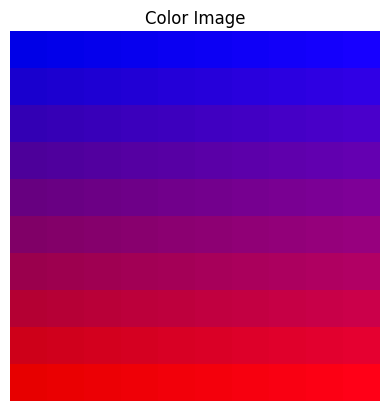

In [37]:
red_channel = np.linspace(0, 255, 10*10).reshape((10, 10)).astype(np.uint8)
green_channel = np.zeros_like(red_channel) #green channel will be all zeros
blue_channel = np.flipud(red_channel)  # flip vertically for a blue gradient

# put channels on top of each other
color_image = np.stack([red_channel, green_channel, blue_channel], axis=-1)

# Display the color image
plt.imshow(color_image)
plt.title("Color Image")
plt.axis('off')  # Hide the axes
plt.show()


## Basic Operations

Let's increase the brightness of the grayscale image.

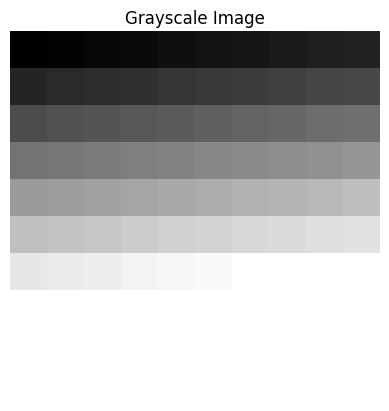

In [43]:
#clip limits the value to be from 0 to 255
scaled_image = np.clip(grayscale_image*1.5, 0, 255).astype(np.uint8)

plt.imshow(scaled_image, cmap="gray")
plt.title("Brightened Grayscale Image")
plt.axis('off')  # Hide the axes
plt.show()

Now let's rotate it.

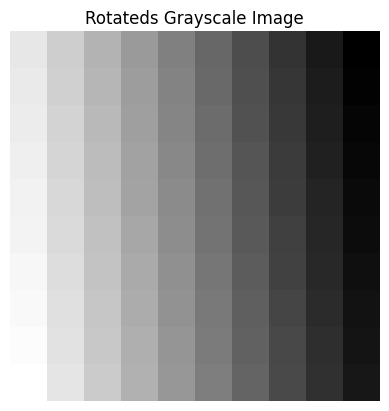

In [47]:
#clip limits the value to be from 0 to 255
rotated_image = np.rot90(grayscale_image, -1)

plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated Grayscale Image")
plt.axis('off')  # Hide the axes
plt.show()

Mean: 127.02
Standard Deviation: 74.34460034192128


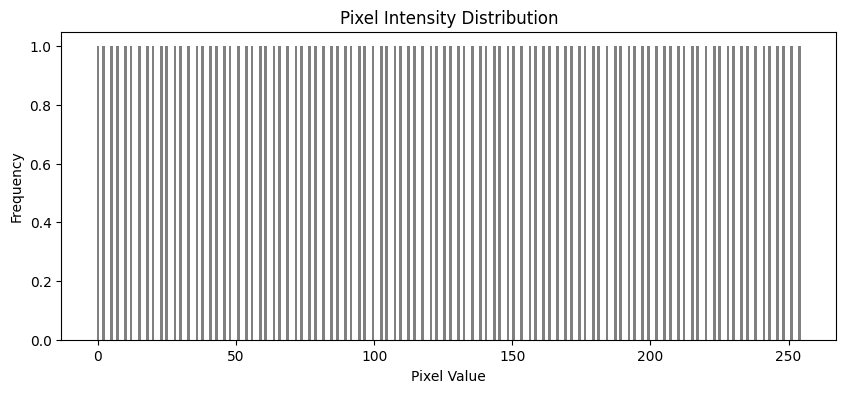

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `grayscale_image` is a 2D NumPy array representing a grayscale image

# Calculate basic statistics
mean = np.mean(grayscale_image)
std_dev = np.std(grayscale_image)
histogram = np.histogram(grayscale_image, bins=256, range=(0, 255))

# Print statistics
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Plot the histogram
plt.figure(figsize=(10, 4))
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.bar(histogram[1][:-1], histogram[0], width=1, color='gray')
plt.show()


Mean (R, G, B): (127.02, 0.0, 127.02)
Standard Deviation (R, G, B): (74.34460034192128, 0.0, 74.34460034192128)


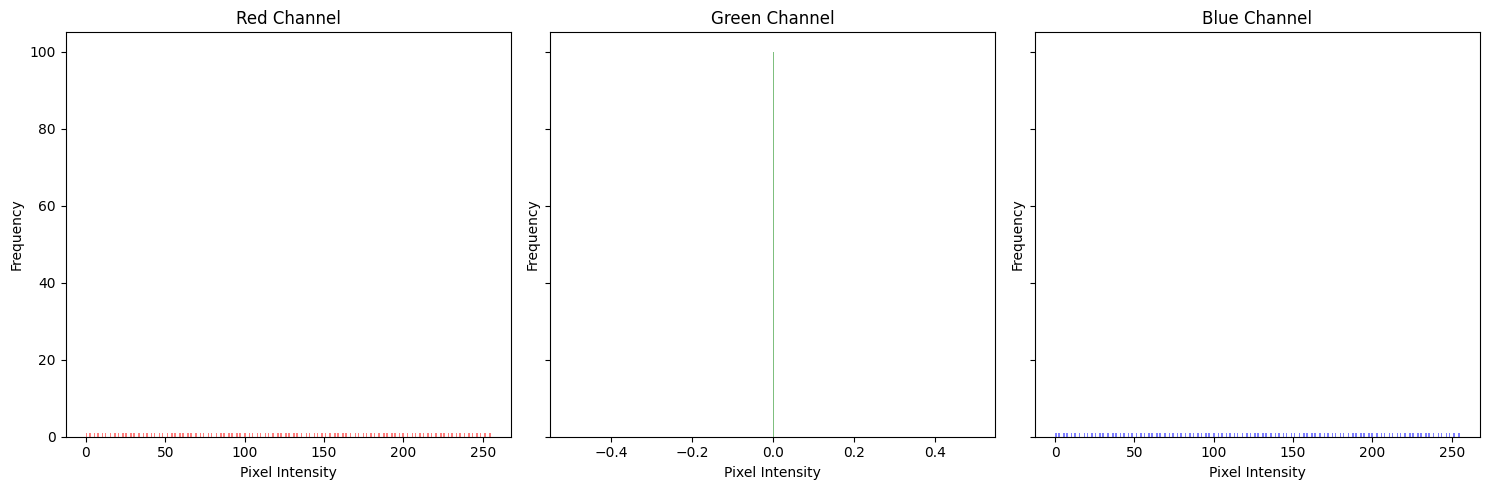

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `color_image` is a 3D NumPy array representing a color image
# color_image.shape would be (height, width, 3)

# Calculate mean and standard deviation for each channel
mean_red = np.mean(color_image[:, :, 0])
mean_green = np.mean(color_image[:, :, 1])
mean_blue = np.mean(color_image[:, :, 2])

std_dev_red = np.std(color_image[:, :, 0])
std_dev_green = np.std(color_image[:, :, 1])
std_dev_blue = np.std(color_image[:, :, 2])

# Print statistics
print(f"Mean (R, G, B): ({mean_red}, {mean_green}, {mean_blue})")
print(f"Standard Deviation (R, G, B): ({std_dev_red}, {std_dev_green}, {std_dev_blue})")

# Plot histograms for each color channel
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].hist(color_image[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
axs[0].set_title('Red Channel')
axs[1].hist(color_image[:, :, 1].ravel(), bins=256, color='green', alpha=0.5)
axs[1].set_title('Green Channel')
axs[2].hist(color_image[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5)
axs[2].set_title('Blue Channel')

for ax in axs:
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [50]:
from sklearn.cluster import KMeans

# Reshape the image array into a 2D array of (R, G, B) values
pixels = color_image.reshape(-1, 3)

# Use KMeans to find clusters in the color space
kmeans = KMeans(n_clusters=3, random_state=0).fit(pixels)

# The cluster centers are our dominant colors
dominant_colors = kmeans.cluster_centers_

print("Dominant Colors (RGB):")
print(dominant_colors)


Dominant Colors (RGB):
[[139.9          0.         114.13333333]
 [ 49.75         0.         204.3       ]
 [217.16666667   0.          36.86666667]]


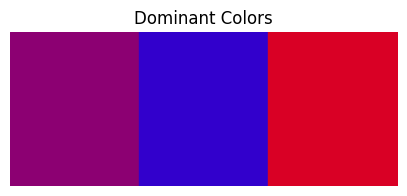

In [51]:
import matplotlib.pyplot as plt

# Assuming `dominant_colors` contains the RGB values of the dominant colors extracted by k-means
# Make sure the color values are normalized between 0 and 1 for Matplotlib

# Normalize the RGB values if they are not already (assuming the values are in the 0-255 range)
dominant_colors_normalized = dominant_colors / 255

# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(5, 2))

# For each dominant color, plot a rectangle with the color
for i, color in enumerate(dominant_colors_normalized):
    # Plot a rectangle with the dominant color
    # The rectangle's width extends a fraction of the plot's width proportional to the number of colors
    rect = plt.Rectangle((i * 1.0 / len(dominant_colors), 0), 1.0 / len(dominant_colors), 1, color=color)
    ax.add_patch(rect)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')  # Hide the axes
plt.title("Dominant Colors")
plt.show()
